In [139]:
using Plots, LinearAlgebra, ForwardDiff

In [140]:
function line_search(ϵ,σ,β::Float64, f,g,x)
    X=[]
    F=[]
    x_0=x
    f_0=f(x_0)
    g_0=g(x_0)
    push!(X,x_0)
    push!(F,f_0)
    while true
        d=-g_0
        t=1
        while f(x_0+t*d) > f_0+σ*t*dot(g(x_0),d)
            t=t*β
        end
        x_0=x_0+t*d
        f_0=f(x_0)
        g_0=g(x_0)
        
        push!(X,x_0)
        push!(F,f_0)
        
        if norm(g_0)<ϵ
            return X,F
        end
    end
end

line_search (generic function with 1 method)

In [141]:
f(x) = cos(x)
g(x) = -sin(x)

g (generic function with 1 method)

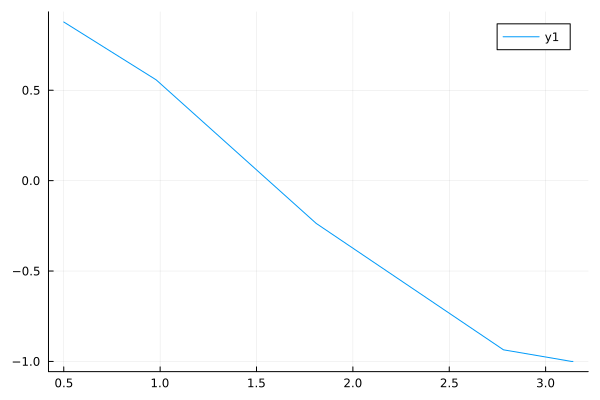

In [142]:
X,F = line_search(0.001,0.01,0.5,f,g,0.5)

plot(X,F)

In [143]:
f1(x)=(x[1]^2+x[2]-11)^2+(x[1]+x[2]^2-7)^2

g1(x)=[2*(x[1]^2+x[2]-11)*(2*x[1])+2*(x[1]+x[2]^2-7),2*(x[1]^2+x[2]-11)+2*(x[1]+x[2]^2-7)*(2*x[2])]

g1 (generic function with 1 method)

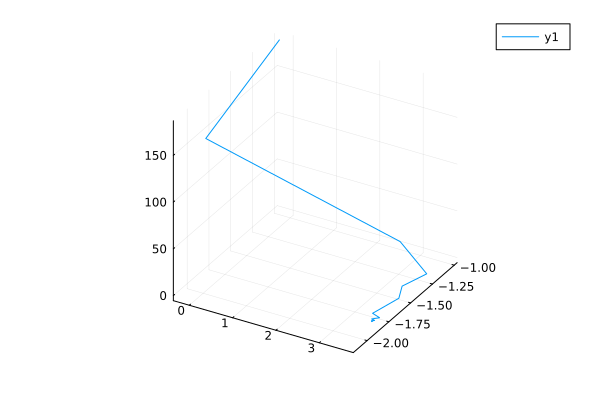

In [144]:
X1,F1 = line_search(0.1,0.01,0.5,f1,g1,[-0.25,-1])
X_ax=[X1[i][1] for i in 1:length(X1)]
Y_ax=[X1[i][2] for i in 1:length(X1)]
f11(x,y)=(x^2+y-11)^2+(x+y^2-7)^2
plot(X_ax,Y_ax,F1)

3.585339150743385 -1.8478939302182442 4.5739371451283974e-5


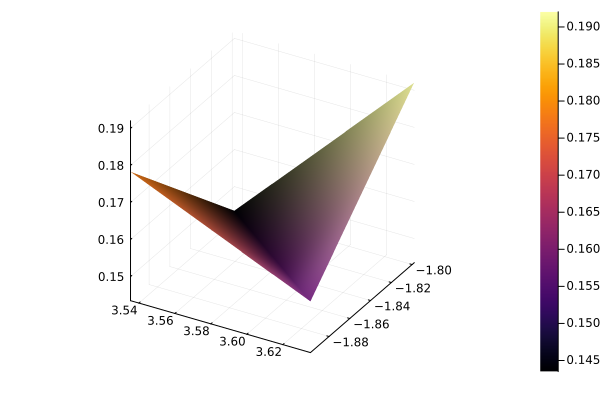

In [145]:
l=length(X1)
println(X1[l][1],' ',X1[l][2],' ',F1[l])
surface([X1[l][1]-0.05,X1[l][1]+0.05],[X1[l][2]-0.05,X1[l][2]+0.05],f11)

In [146]:
f2(x)=6*x[1]^2-6*x[1]*x[2]+2*x[2]^2+x[1]+x[2]+1
g2(x)=[12*x[1]-6*x[2]+1,-6*x[1]+4*x[2]+1]

g2 (generic function with 1 method)

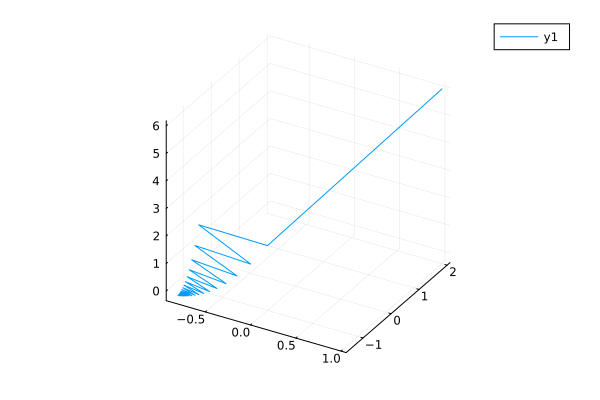

In [147]:
X2,F2 = line_search(0.01,0.01,0.5,f2,g2,[1,2])
X_ax=[X2[i][1] for i in 1:length(X2)]
Y_ax=[X2[i][2] for i in 1:length(X2)]
plot(X_ax,Y_ax,F2)


In [148]:
grad_f2(x)=ForwardDiff.gradient(f2,x)
X22,F22 = line_search(0.01,0.01,0.5,f2,g2,[1,2])

(Any[[1, 2], [0, -1], [-0.875, -0.625], [-0.15625, -1.09375], [-0.8671875, -0.7890625], [-0.283203125, -1.169921875], [-0.86083984375, -0.92236328125], [-0.3863525390625, -1.2318115234375], [-0.855682373046875, -1.030670166015625], [-0.47016143798828125, -1.2820968627929688]  …  [-0.8334864490385152, -1.49678457019118], [-0.8308452031241276, -1.4985071218744763], [-0.8334577398437932, -1.497387463280334], [-0.8313117275383539, -1.4987870365230118], [-0.8334344136230818, -1.4978773139152715], [-0.8316907786249128, -1.499014467174947], [-0.8334154610687541, -1.498275317556158], [-0.8319987576327417, -1.4991992545796444], [-0.8334000621183626, -1.4985986955143784], [-0.8322489905766026, -1.4993493943459613]], Any[6, 2, 1.59375, 1.263671875, 0.9954833984375, 0.7775802612304688, 0.6005339622497559, 0.45668384432792664, 0.3398056235164404, 0.24484206910710782  …  -0.16664289402562482, -0.16664735139582, -0.16665097300910303, -0.1666539155698974, -0.16665630640053997, -0.16665824895043913, -0

-0.8322489905766026 -1.4993493943459613 -0.16666299817311914


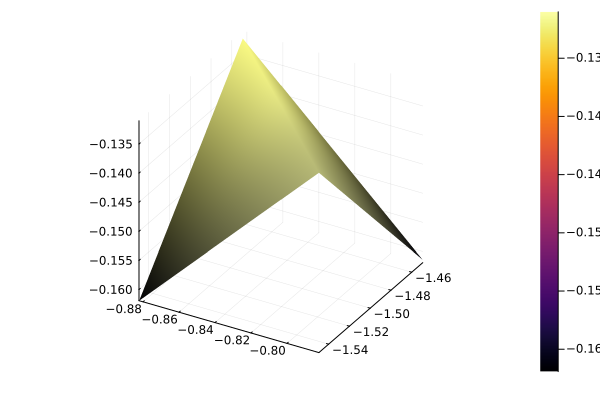

In [149]:

f22(x,y)=6*x^2-6*x*y+2*y^2+x+y+1
l=length(X2)
println(X2[l][1],' ',X2[l][2],' ',F2[l])
surface([X2[l][1]-0.05,X2[l][1]+0.05],[X2[l][2]-0.05,X2[l][2]+0.05],f22)

In [150]:
ϵ=10^(-1)

0.1

In [151]:
f3(x)=(1-x[1])^2+100*(x[2]-x[1]^2)^2
g3(x)=[-2*(1-x[1])+2*100*(x[2]-x[1]^2)*(-2*x[1]),2*100*(x[2]-x[1]^2)]

g3 (generic function with 1 method)

In [152]:
ϵ=10^(-5)
sigma=10^(-4)

0.0001

In [153]:
X3,F3 = line_search(ϵ,sigma,0.5,f3,g3,[-1.2,1])
l = length(X3)
println(X3[l],' ',l)

[0.9999921836179727, 0.9999843200524485] 10917


In [154]:
grad_f3(x)=ForwardDiff.gradient(f3,x)

grad_f3 (generic function with 1 method)

In [155]:
X4,F4 = line_search(ϵ,sigma,0.5,f3,grad_f3,[-1.2,1])
l = length(X4)
println(X4[l],' ',l)

[0.9999921836179727, 0.9999843200524485] 10917
